# Interpolation and cubic splines


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
%matplotlib inline


In [2]:
def myLagrangeInterp(x,datax,dataf):
    if (len(datax) != len(dataf)): #note != means not equals and == means equals
        print("data arrays not same size!")
        return
    s = 0.
    for i in range(len(dataf)):
        prod = dataf[i]
        for j in range(len(datax)):
            if (i != j):
                prod *= (x-datax[j])/(datax[i] - datax[j])
        s+=prod
    
    return(s)

### Interpolating polynomials are senstive to data

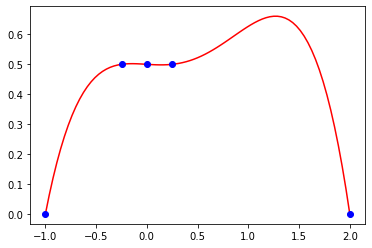

In [3]:
datax = np.array([-1,-0.25,0,0.25,2])
dataf = np.array([0,0.5,0.5,0.5,0])
x = np.linspace(-1,2,81)
y = myLagrangeInterp(x,datax,dataf)
plt.plot(x,y,'r-',datax,dataf,'bo');

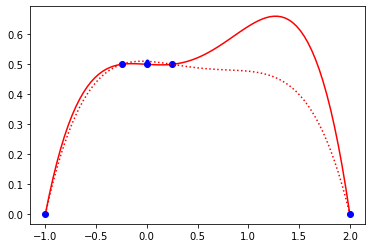

In [4]:
datax = np.array([-1,-0.25,0,0.25,2])
dataf = np.array([0,0.5,0.5,0.5,0])
datax2 = np.copy(datax)             #note use of numpy copy to avoid just assigning a reference 
dataf2 = np.copy(dataf)
dataf2[2] = dataf2[2] + 0.01   #add/substract a little bit to middle y-value
x = np.linspace(-1,2,81)
y = myLagrangeInterp(x,datax,dataf)
y2 = myLagrangeInterp(x,datax2,dataf2)
plt.plot(x,y,'r-',datax,dataf,'bo');
plt.plot(x,y2,'r:',datax2,dataf2,'b.');

### Investigate Vandermonde matrix

In [5]:
#look at vandermonde matrix for situation above
x0,x1,x2,x3,x4 = -1,-0.25,0,0.25,2
A = np.array([[1, x0, x0**2,x0**3,x0**4], 
              [1, x1, x1**2,x1**3,x1**4],
              [1, x2, x2**2,x2**3,x2**4],
              [1, x3, x3**2,x3**3,x3**4],
              [1, x4, x4**2,x4**3,x4**4]])

w, v = np.linalg.eig(A)  #w are eigenvalues #v are (right)eigenvectors
print(w)
#condition number is roughly a ratio of largest to smallest eigenvalues
#it is the norm of A times the norm of Ainverse
print(np.linalg.cond(A))

#how to find a matrix inverse
#Ainv = np.linalg.inv(A)
#print(Ainv)

s1 = np.linalg.solve(A,dataf)
s2 = np.linalg.solve(A,dataf2)
print(s1)
print(s2)

[16.12594285+0.j          0.49877181+1.32204255j  0.49877181-1.32204255j
 -0.28149255+0.j         -0.07636891+0.j        ]
457.2990469101651
[ 0.5        -0.02089947  0.01243386  0.33439153 -0.1989418 ]
[ 0.51       -0.01589947 -0.15256614  0.25439153 -0.1189418 ]


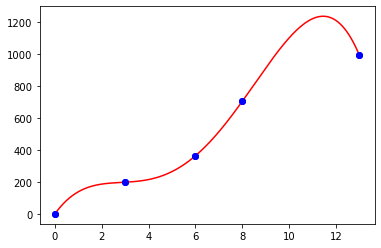

In [6]:
datat = np.array([0,3,6,8,13])
datad = np.array([0,198,363,703,993])

t = np.linspace(0,13,1301)
d = myLagrangeInterp(t,datat,datad)

#dpw = [pwlinearinterp(x,datat,datad) for x in t]

plt.plot(datat,datad,'bo');
#plt.plot(t,dpw,'r-',datat,datad,'bo');
plt.plot(t,d,'r-',datat,datad,'bo');

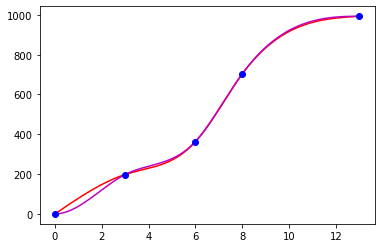

In [7]:
from scipy.interpolate import CubicSpline
datat = np.array([0,3,6,8,13])
datad = np.array([0,198,363,703,993])

csn = CubicSpline(datat,datad,bc_type='natural')
csc = CubicSpline(datat,datad,bc_type='clamped')

t = np.linspace(0,13,1301)
plt.plot(t,csn(t),'r',t,csc(t),'m',datat,datad,'bo');

### fluid data
From F. White Fluid Mechanics
Data for Temperature T in degree C, density in kg/m^3, viscosity in x10^-3 N s/m^2, and vapor pressure in kPa

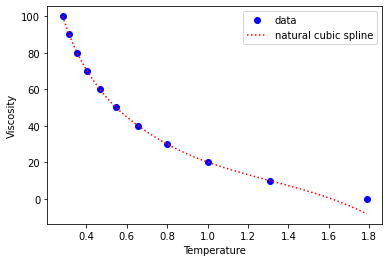

In [25]:
T = np.array([0,10,20,30,40,50,60,70,80,90,100])
rho = np.array([1000,1000,998,996,992,988,983,978,972,965,958])
mu = np.array([1.788,1.307,1.003,0.799,0.657,0.548,0.467,0.405,0.355,0.316,0.283])
vp = np.array([0.611,1.227,2.337,4.242,7.375,12.34,19.92,31.16,47.35,70.11,101.3])

#plt.plot(T,mu,'bo');

#csn = CubicSpline(T,mu,bc_type='natural')
ncsn = CubicSpline(mu[len(mu)-1:0:-1],T[len(T)-1:0:-1],bc_type="natural")
tvals = np.linspace(0,100,1001)

muvals = np.linspace(0.283,1.788,1001)

#csc = CubicSpline(T,mu,bc_type='clamped')
#csk = CubicSpline(T,mu,bc_type='not-a-knot')
plt.plot(mu,T,'bo',muvals,ncsn(muvals),'r:');
plt.legend(['data','natural cubic spline']);
plt.xlabel('Temperature');
plt.ylabel('Viscosity');

In [30]:
Trhocs = CubicSpline(T,rho,bc_type="natural")
def Trhofunc(T):
    return(Trhocs(T)-990)

print(fsolve(Trhofunc,45))

[45.09897699]


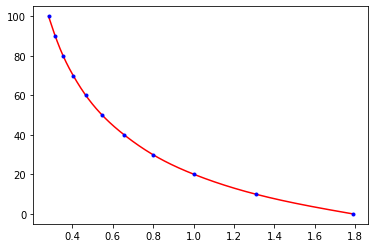

In [27]:
mu_rev = np.flipud(mu) #reverses order of array
T_rev = np.flipud(T)

csn = CubicSpline(mu_rev,T_rev,bc_type='natural')
muvals= np.linspace(0.283,1.788,1001)
plt.plot(muvals,csn(muvals),'r',mu,T,'b.');

### Car data
Acceleration data for the Honda CR-V from Car and Driver magazine (May 1998 p.102) gives the following data:

|Time (sec)|Velocity (mph)|
|---|---|
|0|0|
|3.1|30|
|10.3|60|
|30.1|90|

How long does it take the car to accelerate to 50 mph?

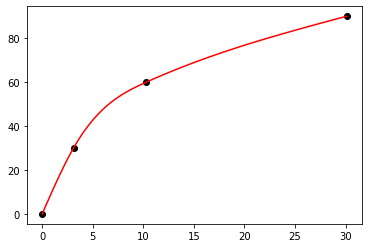

In [13]:
#show pdf to build spline
timedata = np.array([0.,3.1,10.3,30.1])
veldata = np.array([0.,30.,60.,90.])

plt.plot(timedata,veldata,'ko');

cs = CubicSpline(timedata,veldata,bc_type="natural")

ts = np.linspace(0,30.1,101)
vs = cs(ts)

plt.plot(ts,vs,'r');


In [14]:
def func(t):
    return(cs(t)-50)

sol = fsolve(func,8.)
print(sol)

[6.5993436]


In [16]:
newcs = CubicSpline(veldata,timedata,bc_type="natural")
print(newcs(50))

6.6817283950617306
